# Data wrangling Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import json
import datetime
from bs4 import BeautifulSoup
import os
import io
import glob
import tweepy
from google.colab import drive
from tweepy import OAuthHandler
from timeit import default_timer as timer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1- Data Gathering

In [ ]:
# reading .txt file downloaded manually.
row_data = pd.read_csv('/content/Wrangling_data.txt')


In [ ]:
row_data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df_1 = row_data

# Set the column names of df_1
df_1.columns = cols


In [ ]:
df_1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470





## 2- Data Assessing

### 2-1- Tidiness issues

In [ ]:
df_1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#####  Each variable forms a column and contains values
- column heders are values, not variable names
- variable names contains '-' must be replace to '_'

##### Each observation forms a row
- nothing

#####  Each type of observational unit forms a table
- nothing



### 2-2- Quality issues

In [ ]:
df_1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [ ]:
for column in df_1.columns:
    print(f"Value counts for {column}:")
    print(df_1[column].value_counts().sort_index())
    print("\n" + "="*40 + "\n")


Value counts for symboling:
symboling
-2     3
-1    22
 0    67
 1    54
 2    32
 3    26
Name: count, dtype: int64


Value counts for normalized-losses:
normalized-losses
101     3
102     5
103     5
104     6
106     4
107     1
108     2
110     2
113     2
115     3
118     4
119     2
121     1
122     4
125     3
128     6
129     2
134     6
137     3
142     1
145     2
148     4
150     7
153     2
154     3
158     2
161    11
164     2
168     5
186     1
188     2
192     2
194     2
197     2
231     1
256     1
65      5
74      5
77      1
78      1
81      2
83      3
85      5
87      2
89      2
90      1
91      8
93      4
94      5
95      5
98      1
?      40
Name: count, dtype: int64


Value counts for make:
make
alfa-romero       2
audi              7
bmw               8
chevrolet         3
dodge             9
honda            13
isuzu             4
jaguar            3
mazda            17
mercedes-benz     8
mercury           1
mitsubishi       13
nissan    

In [ ]:
# Search for all records that contain the value '?' in any column

df_1[df_1.isin(['?']).any(axis=1)]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
13,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
14,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
15,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
16,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
26,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


In [ ]:
# Replace '?' with NaN and then convert to float, handling missing values
# Handle errors by ignoring them
# Alternatively, you can fill missing values with a specific number:
# df_1_cleaned = df_1.replace('?', pd.NA).fillna(0).astype(float)  # Fill missing values with 0

df_1_exp = df_1.replace('?', pd.NA).astype(float, errors='ignore')


df_1_exp.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df_1.duplicated().sum()

0



##### 1- Completeness  :
- 'normalized-losses' column has 40 '?' value this is (19.6%) of all records that is more than  acceptable range (5%) we can drop it.
- in all columns have 12 '?' value we can drop it.

##### 2- Validity :
- {'bore' , 'stroke'} columns must be a float number.
- {'horsepower' , 'peak-rpm' , 'price'} columns must be a number.

##### 3- Accuracy :
- Nothing here.

##### 4- Consistency :
- Nothing here.

## 3- Data Cleaning

In [ ]:
# making a copy fromthe dataframe :
df_1_clean = df_1.copy()
df_1_clean

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### 3-1 Fixing Tidiness issues

#### 3-1-1 Each variable forms a column and contains values




##### A- Define :


* variable names contains '-' must be replace to '_'




##### B- Code :
    

In [ ]:
df_1_clean.columns = df_1_clean.columns.str.replace('-', '_')


##### C- Test :

In [ ]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_of_doors       204 non-null    object 
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_of_cylinders   204 non-null    object 
 16  engine_size        204 non

### 3-2 Fixing Quality Issues

#### 3-2-1 Completeness :

##### A- Define :

* We need to drop 'normalized_losses' column.








##### B- Code :
    

In [ ]:
# dropping column 'normalized_losses':
df_1_clean.drop(columns = 'normalized_losses', inplace = True)

##### C- Test:

In [ ]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   make               204 non-null    object 
 2   fuel_type          204 non-null    object 
 3   aspiration         204 non-null    object 
 4   num_of_doors       204 non-null    object 
 5   body_style         204 non-null    object 
 6   drive_wheels       204 non-null    object 
 7   engine_location    204 non-null    object 
 8   wheel_base         204 non-null    float64
 9   length             204 non-null    float64
 10  width              204 non-null    float64
 11  height             204 non-null    float64
 12  curb_weight        204 non-null    int64  
 13  engine_type        204 non-null    object 
 14  num_of_cylinders   204 non-null    object 
 15  engine_size        204 non-null    int64  
 16  fuel_system        204 non

In [ ]:
# Search for all records that contain the value '?' in any column

df_1_clean[df_1_clean.isin(['?']).any(axis=1)]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
8,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
26,1,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
43,1,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
44,0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
54,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,?,?,9.4,135,6000,16,23,15645
62,0,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
128,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


##### A- Define :




* We need to drop 12 '?' value


##### B- Code :
    

In [ ]:
# index of all '?' values
row = df_1_clean[df_1_clean.isin(['?']).any(axis=1)].index
# Drop rows with '?' values
df_1_clean.drop(row, inplace = True)

##### C-Test:

In [ ]:
df_1_clean[df_1_clean.isin(['?']).any(axis=1)]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


#### 2- Validity :

##### A- Define :
* {'bore' , 'stroke'} columns must be a float number.

##### B- Code :
    

In [ ]:
df_1_clean[['bore','stroke']] = df_1_clean[['bore','stroke']].astype(float)

#### C-Test:

In [ ]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 203
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          192 non-null    int64  
 1   make               192 non-null    object 
 2   fuel_type          192 non-null    object 
 3   aspiration         192 non-null    object 
 4   num_of_doors       192 non-null    object 
 5   body_style         192 non-null    object 
 6   drive_wheels       192 non-null    object 
 7   engine_location    192 non-null    object 
 8   wheel_base         192 non-null    float64
 9   length             192 non-null    float64
 10  width              192 non-null    float64
 11  height             192 non-null    float64
 12  curb_weight        192 non-null    int64  
 13  engine_type        192 non-null    object 
 14  num_of_cylinders   192 non-null    object 
 15  engine_size        192 non-null    int64  
 16  fuel_system        192 non-null

##### A- Define :
* {'horsepower' , 'peak-rpm' , 'price'} columns must be a number.

##### B- Code :
    

In [ ]:
df_1_clean[['horsepower' , 'peak_rpm' , 'price']] = df_1_clean[['horsepower' , 'peak_rpm' , 'price']].astype(int)

#### C-Test:

In [ ]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 203
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          192 non-null    int64  
 1   make               192 non-null    object 
 2   fuel_type          192 non-null    object 
 3   aspiration         192 non-null    object 
 4   num_of_doors       192 non-null    object 
 5   body_style         192 non-null    object 
 6   drive_wheels       192 non-null    object 
 7   engine_location    192 non-null    object 
 8   wheel_base         192 non-null    float64
 9   length             192 non-null    float64
 10  width              192 non-null    float64
 11  height             192 non-null    float64
 12  curb_weight        192 non-null    int64  
 13  engine_type        192 non-null    object 
 14  num_of_cylinders   192 non-null    object 
 15  engine_size        192 non-null    int64  
 16  fuel_system        192 non-null

_______________________________________________________________________________________________________________________________

## 4- Data Storing  

In [ ]:
df_1_clean.to_csv('cleaned_Wrangling_data.csv')

## 5- Data Visualization

### 5-1 car price Insights :

#### 5-1-1 price Based on brand maker :

In [ ]:
#Rating mean for each brand:
mean = df_1_clean.groupby('make').price.mean()

# Use mean() instead of Average()
mean

,price
make,
alfa-romero,16500.000000
audi,17859.166667
bmw,26118.750000
chevrolet,6007.000000
dodge,7790.125000
honda,8184.692308
isuzu,8916.500000
jaguar,34600.000000
mazda,9852.000000


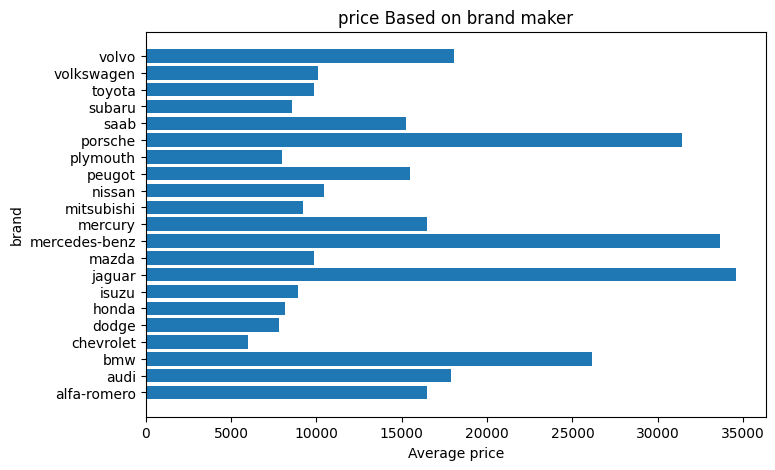

In [ ]:
plt.subplots(figsize=(8, 5))
plt.barh(mean.index,mean)
plt.title('price Based on brand maker')
plt.xlabel('Average price')
plt.ylabel('brand');
plt.savefig('price_Based_on_brand_maker')

#### 5-1-2 Dogs total interaction Based on their breed :

In [ ]:
#Rating mean for each brand:
mean1 = df_1_clean.groupby('make')['city_mpg'].mean()

# Use mean() instead of Average()
mean1

,city_mpg
make,
alfa-romero,20.000000
audi,19.333333
bmw,19.375000
chevrolet,41.000000
dodge,28.500000
honda,30.384615
isuzu,24.000000
jaguar,14.333333
mazda,27.833333


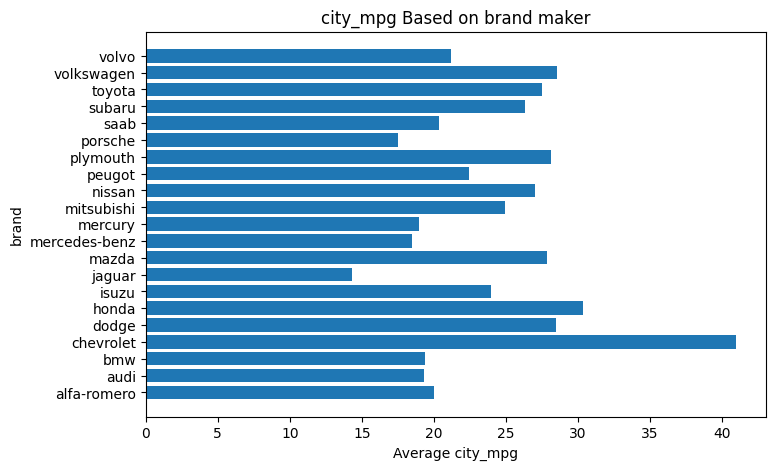

In [ ]:
plt.subplots(figsize=(8, 5))
plt.barh(mean1.index,mean1)
plt.title('city_mpg Based on brand maker')
plt.xlabel('Average city_mpg')
plt.ylabel('brand');
plt.savefig('city_mpg_Based_on_brand_maker')